OptaPyDOS example - Joint Density of States of Silicon
=============================
From those great kids that brought you OptaDOS and J. Kermode, a gentleman.

Prerequisites:

* OptaDOS complied using gfortran. `make`
* OptaPyDOS python libraries. `make python`
* CASTEP run in optados/eaxmples/Si2_JDOS. `castep Si2`
* OptaPyDOS_Tools which should be found in `optados/python`

In [14]:
import os
os.environ['GFORTRAN_CONVERT_UNIT'] = 'big_endian' # Must do this BEOFRE invoking OptaPyDOS
%matplotlib inline
import OptaPyDOS as opd        # OptaPyDOS Low level functions
import OptaPyDOS_Tools as opdt # OptaPyDOS wrapper scripts
import matplotlib.pyplot as plt
import numpy as np

Let's do something obvious and check that both modules are set up ok.

In [15]:
print " OptaDOS version:", opd.od_constants.optados_version
print " OptaPyDOS Tools version:", opdt.od_OptaPyDOS_tools_version

 OptaDOS version:  1.2  
 OptaPyDOS Tools version: 1.0


If you managed two get to version numbers printed out above then you have `opd` and `opdt` working. Now lets read in an `odi` file using `od_setup_from_file` is a function to initilaise OptaPyDOS

In [16]:
opdt.od_setup_from_file('../examples/Si2_JDOS/Si2')

 OptaPyDOS Tools -- Setup Calculation from Seedname
 Seedname: ../examples/Si2_JDOS/Si2                          


One may then tweak the input parameters.

In [17]:
opd.od_parameters.dos_spacing=0.1

We might as well do all three types of smearing

In [18]:
opd.od_parameters.adaptive=1
opd.od_parameters.linear=1
opd.od_parameters.fixed=1

We are now all set up call the routine to calculate the JDOS.

In [12]:
opd.od_jdos.jdos_calculate() # Calculate the JDOS
#opd.od_jdos_utils.jdos_utils_calculate() # Somthing odd about optional arguments.

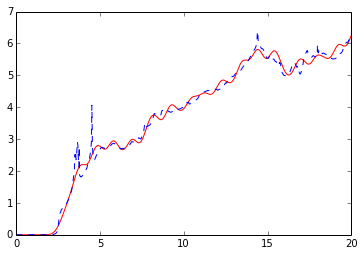

In [13]:
plt.plot(opd.od_jdos_utils.e[0:2000],opd.od_jdos_utils.jdos_fixed[0:2000],color='red');
plt.plot(opd.od_jdos_utils.e[0:2000],opd.od_jdos_utils.jdos_linear[0:2000],color='blue',linestyle="dashed");